In [2]:
import json

def make_string(r, metric):
    s = f"{r['Config']}\t{r['score-params']}"
    if isinstance(metric, str):
        s += f"\t{r['score-' + metric]}\t{r['score-' + metric + '_std']}"
    elif isinstance(metric, list):
        for m in metric:
            if 'score-' + m in r:
                s += f"\t{r['score-' + m]}\t{r['score-' + m + '_std']}"
            else:
                s += f"\t-1.0\t-1.0"
    else:
        raise ValueError
    return s

def load_and_print(file_names, dataset, split, metric):
    results = []
    for fn in file_names:
        with open(fn, 'r') as f:
            results.extend(json.load(f))
    results.sort(key=lambda x: x['Config'])
    for res in results:
        if res['Dataset'] != dataset or res['Split'] != split:
            continue
        # if res['Config'].endswith('slic10'):
        print(make_string(res, metric))

## Pascal and COCO: 8-layer and 4-layer GT-models

## Peptides (Functional and Structural)

In [3]:
load_and_print(['results-peptides-func-hyperpara.json'], '.', 'test', 'ap')

pept-func_drew-frond_bs=0128_d=016_L=02_Alpha=0.7	18432801.0	0.19976	0.0
pept-func_drew-frond_bs=0128_d=016_L=02_DW=0.0001	18432801.0	0.20229	0.0
pept-func_drew-frond_bs=0128_d=016_L=02_Hiddendim=128	4645281.0	0.20897	0.0
pept-func_drew-frond_bs=0128_d=016_L=02_Hiddendim=512	73434657.0	0.20297	0.0
pept-func_drew-frond_bs=0128_d=016_L=02_base	18432801.0	0.21269	0.0
pept-func_drew-frond_bs=0128_d=016_L=02_lr=0.0003	18432801.0	0.21199	0.0
pept-func_drew-frond_bs=0128_d=016_L=02_lr=0.003	18432801.0	0.21203	0.0
pept-func_drew_gnn_bs=0128_d=016_L=02	3818.0	0.32476	0.0
pept-func_gatedgcnconv_bs=0128_d=138_L=05	509506.0	0.57835	0.0
pept-func_gineconv_bs=0128_d=208_L=05	475706.0	0.55951	0.0
pept-func_stack_bs=0128_d=300_L=05	508210.0	0.59644	0.0


In [3]:
pip install matplotlib

/bin/bash: /media/ntu/volume1/home/s124md302_08/miniconda3/envs/drew/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Note: you may need to restart the kernel to use updated packages.


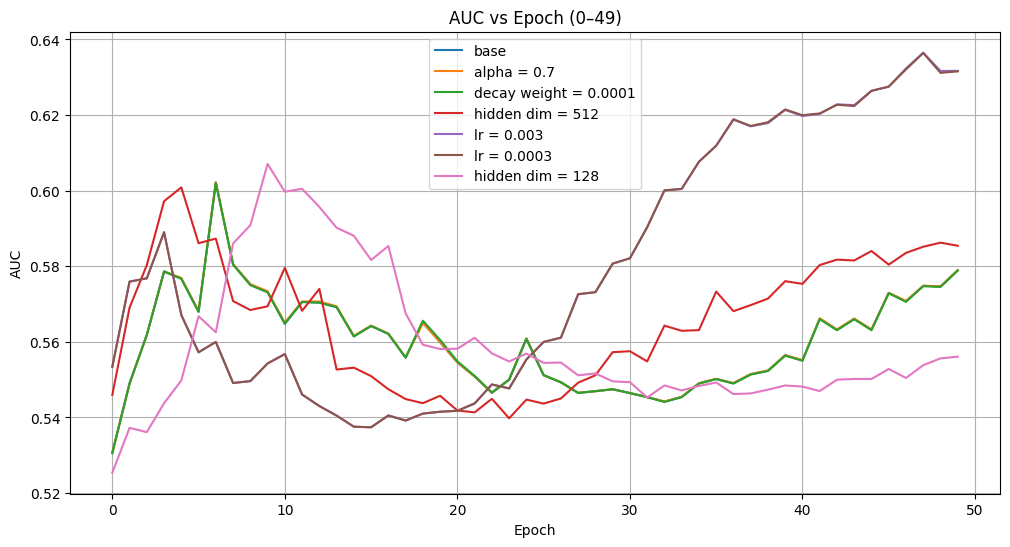

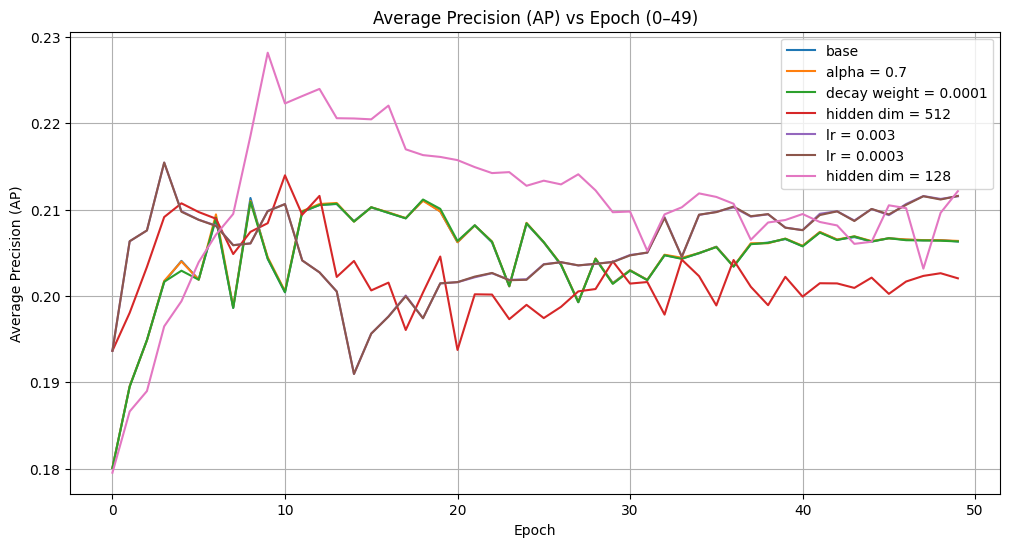

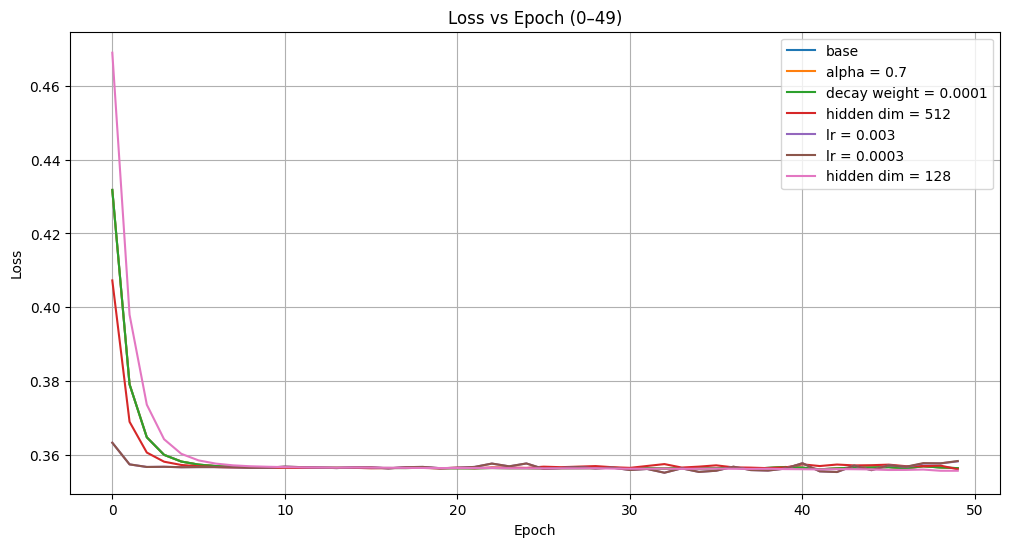

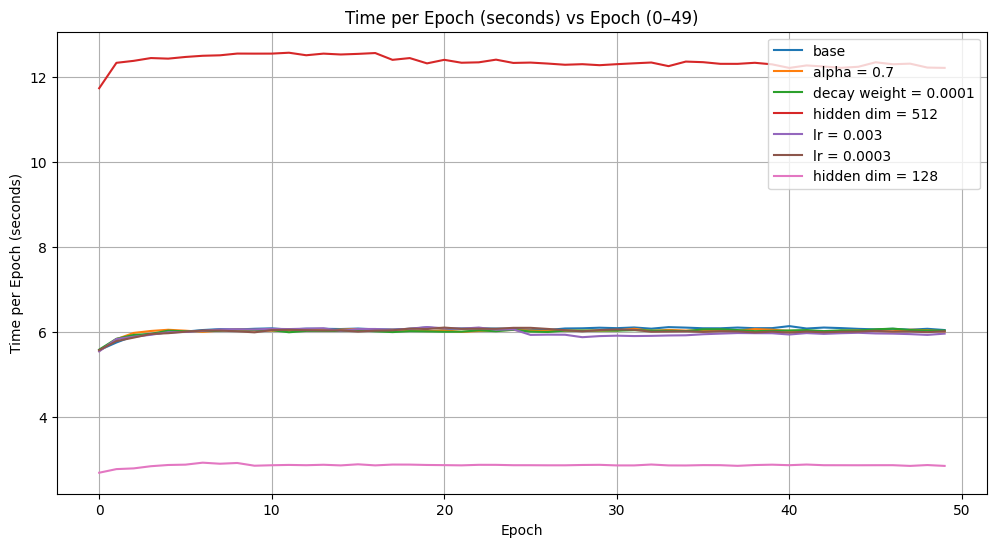

In [13]:
import os
import json
import matplotlib.pyplot as plt

# Set your absolute base directory
base_dir = '/media/ntu/volume1/home/s124md302_08/models/DRew/lrgb/results'

# Configs and their display labels
configs = {
    "pept-func_drew-frond_bs=0128_d=016_L=02_base": "base",
    "pept-func_drew-frond_bs=0128_d=016_L=02_Alpha=0.7": "alpha = 0.7",
    "pept-func_drew-frond_bs=0128_d=016_L=02_DW=0.0001": "decay weight = 0.0001",
    "pept-func_drew-frond_bs=0128_d=016_L=02_Hiddendim=512": "hidden dim = 512",
    "pept-func_drew-frond_bs=0128_d=016_L=02_lr=0.003": "lr = 0.003",
    "pept-func_drew-frond_bs=0128_d=016_L=02_lr=0.0003": "lr = 0.0003",
    "pept-func_drew-frond_bs=0128_d=016_L=02_Hiddendim=128": "hidden dim = 128"
}

all_data = {}

# Load data
for config, label in configs.items():
    stats_path = os.path.join(base_dir, config, 'agg', 'val', 'stats.json')
    
    if not os.path.isfile(stats_path):
        print(f"Skipping {label} – stats.json not found at {stats_path}")
        continue

    with open(stats_path, 'r') as f:
        stats = [json.loads(line) for line in f if line.strip()]  # line-by-line JSON

    # Restrict to epoch 0–49
    epochs = [entry['epoch'] for entry in stats if entry['epoch'] <= 49]
    aucs   = [entry['auc'] for entry in stats if entry['epoch'] <= 49]
    aps    = [entry['ap'] for entry in stats if entry['epoch'] <= 49]
    losses = [entry['loss'] for entry in stats if entry['epoch'] <= 49]
    times  = [entry['time_epoch'] for entry in stats if entry['epoch'] <= 49]

    all_data[label] = {
        'epoch': epochs,
        'auc': aucs,
        'ap': aps,
        'loss': losses,
        'time': times
    }

# Plot function
def plot_metric(metric, ylabel):
    plt.figure(figsize=(12, 6))
    for label, data in all_data.items():
        plt.plot(data['epoch'], data[metric], label=label)
    plt.xlabel('Epoch')
    plt.ylabel(ylabel)
    plt.title(f'{ylabel} vs Epoch (0–49)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot each metric
plot_metric('auc', 'AUC')
plot_metric('ap', 'Average Precision (AP)')
plot_metric('loss', 'Loss')
plot_metric('time', 'Time per Epoch (seconds)')


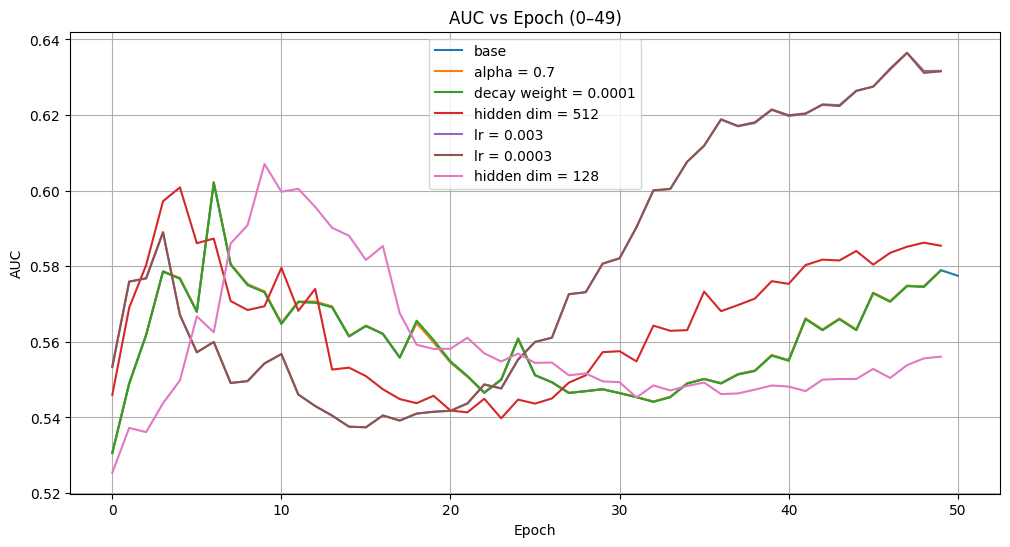

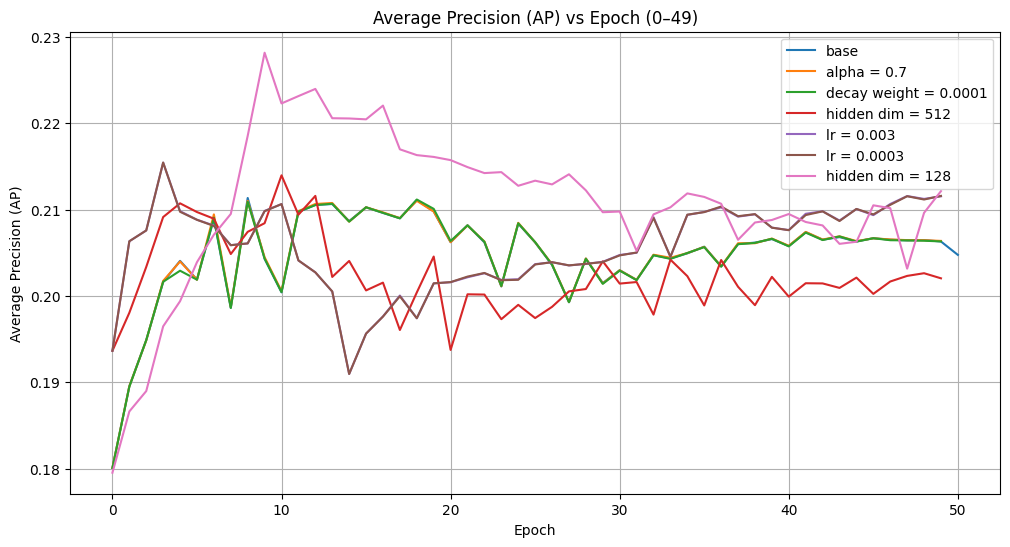

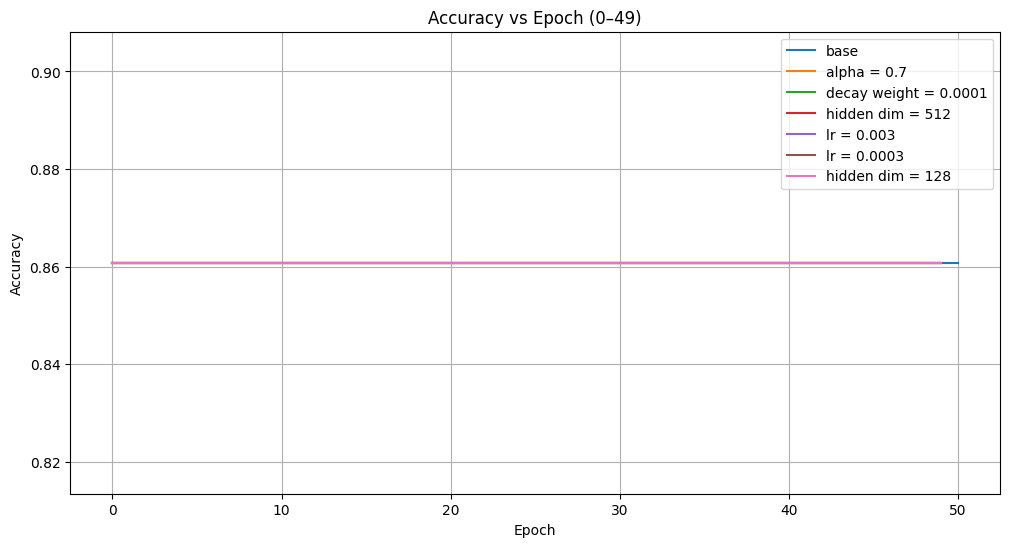

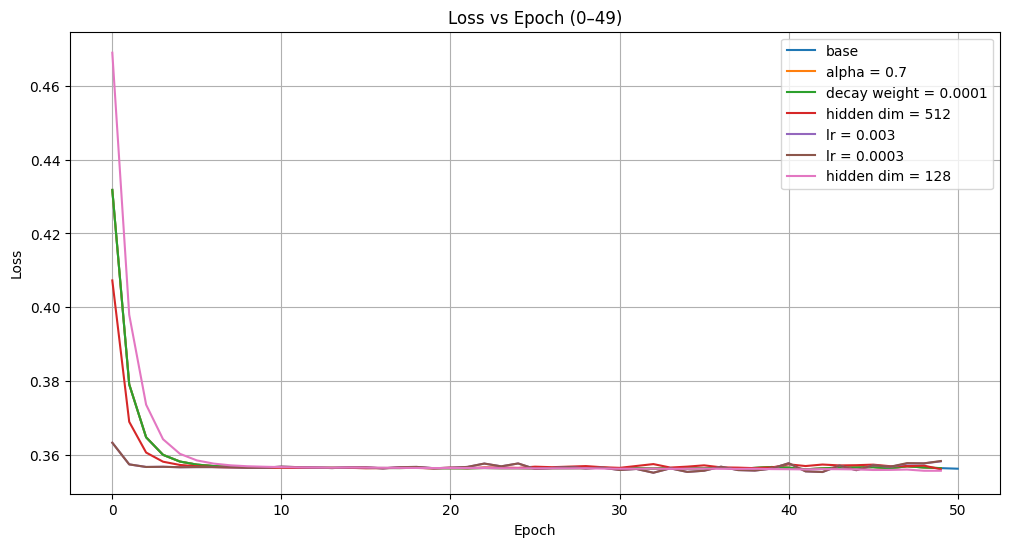

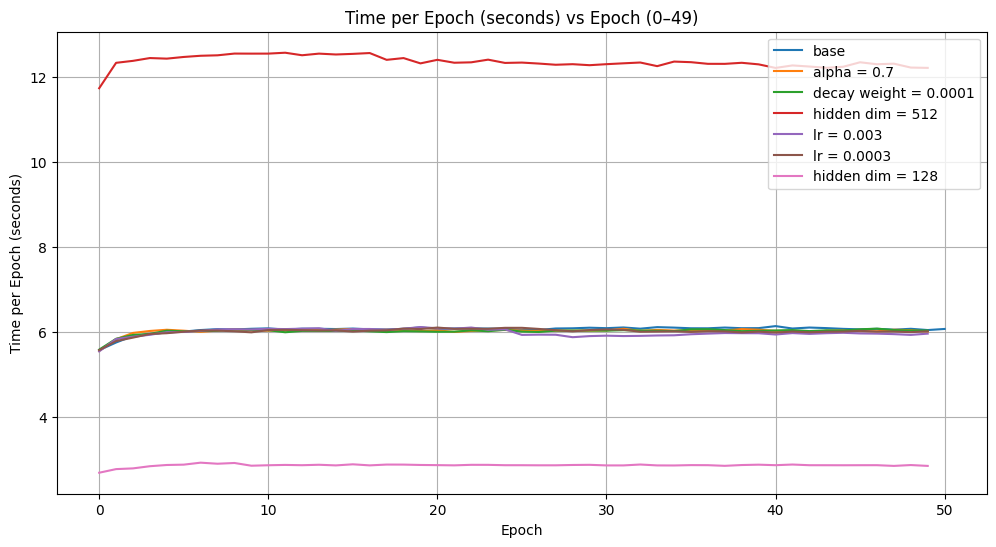

In [15]:
import os
import json
import matplotlib.pyplot as plt

# Set your absolute base directory
base_dir = '/media/ntu/volume1/home/s124md302_08/models/DRew/lrgb/results'

# Configs and their display labels
configs = {
    "pept-func_drew-frond_bs=0128_d=016_L=02_base": "base",
    "pept-func_drew-frond_bs=0128_d=016_L=02_Alpha=0.7": "alpha = 0.7",
    "pept-func_drew-frond_bs=0128_d=016_L=02_DW=0.0001": "decay weight = 0.0001",
    "pept-func_drew-frond_bs=0128_d=016_L=02_Hiddendim=512": "hidden dim = 512",
    "pept-func_drew-frond_bs=0128_d=016_L=02_lr=0.003": "lr = 0.003",
    "pept-func_drew-frond_bs=0128_d=016_L=02_lr=0.0003": "lr = 0.0003",
    "pept-func_drew-frond_bs=0128_d=016_L=02_Hiddendim=128": "hidden dim = 128"
}

all_data = {}

# Load data
for config, label in configs.items():
    stats_path = os.path.join(base_dir, config, 'agg', 'val', 'stats.json')
    
    if not os.path.isfile(stats_path):
        print(f"Skipping {label} – stats.json not found at {stats_path}")
        continue

    with open(stats_path, 'r') as f:
        stats = [json.loads(line) for line in f if line.strip()]  # line-by-line JSON

    # Restrict to epoch 0–49
    epochs     = [entry['epoch'] for entry in stats if entry['epoch'] <= 50]
    aucs       = [entry['auc'] for entry in stats if entry['epoch'] <= 50]
    aps        = [entry['ap'] for entry in stats if entry['epoch'] <= 50]
    losses     = [entry['loss'] for entry in stats if entry['epoch'] <= 50]
    times      = [entry['time_epoch'] for entry in stats if entry['epoch'] <= 50]
    accuracies = [entry['accuracy'] for entry in stats if entry['epoch'] <= 50]

    all_data[label] = {
        'epoch': epochs,
        'auc': aucs,
        'ap': aps,
        'loss': losses,
        'time': times,
        'accuracy': accuracies
    }

# Plot function
def plot_metric(metric, ylabel):
    plt.figure(figsize=(12, 6))
    for label, data in all_data.items():
        plt.plot(data['epoch'], data[metric], label=label)
    plt.xlabel('Epoch')
    plt.ylabel(ylabel)
    plt.title(f'{ylabel} vs Epoch (0–49)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot each metric
plot_metric('auc', 'AUC')
plot_metric('ap', 'Average Precision (AP)')
plot_metric('accuracy', 'Accuracy')
plot_metric('loss', 'Loss')
plot_metric('time', 'Time per Epoch (seconds)')

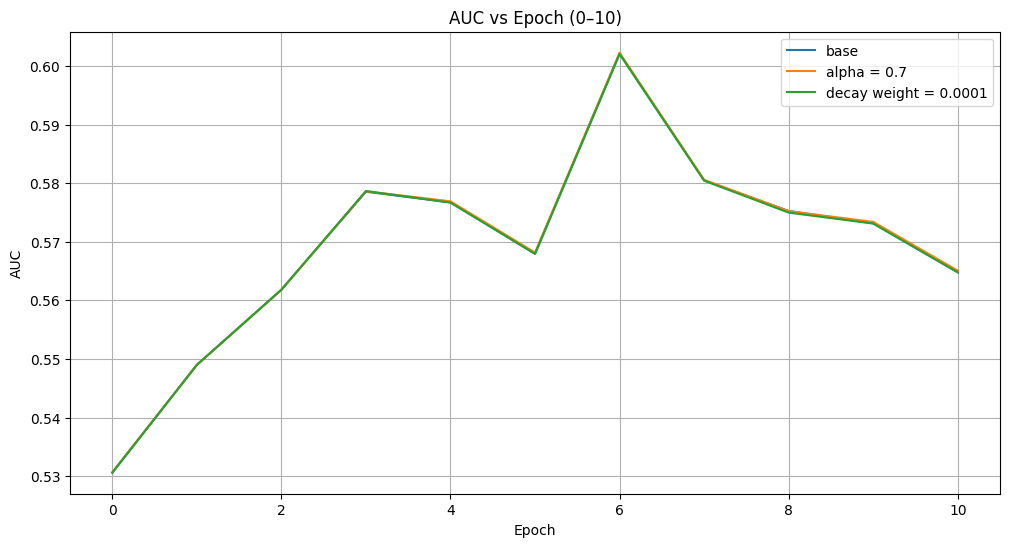

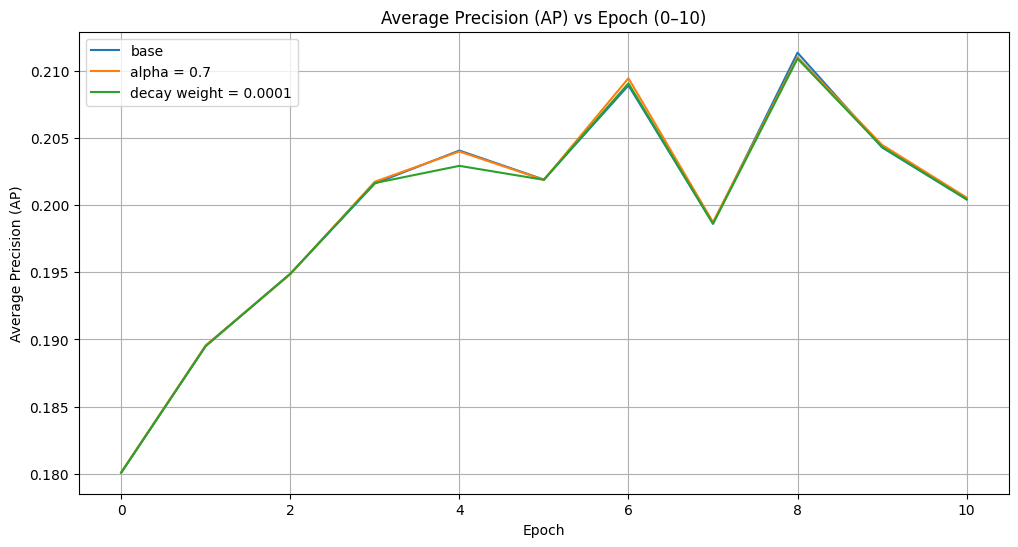

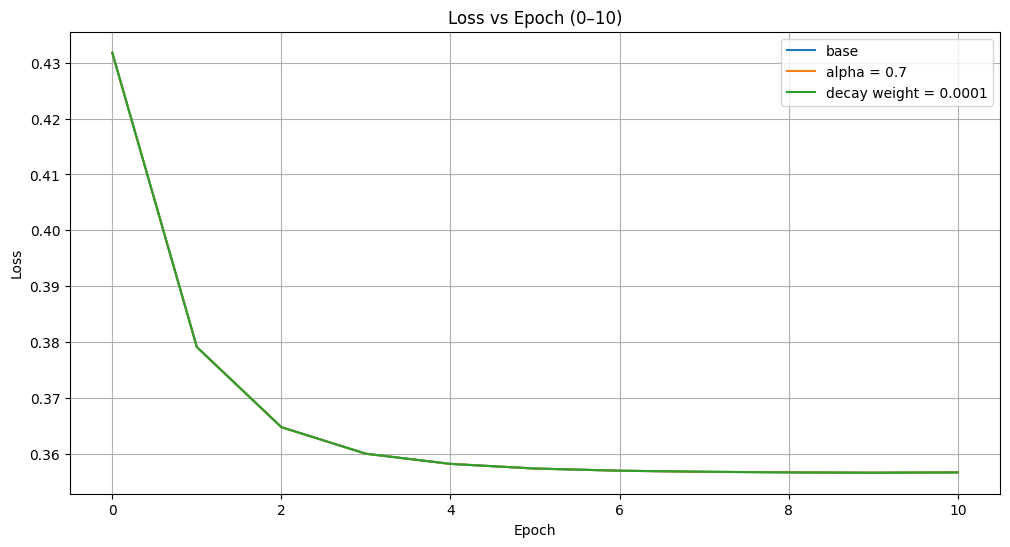

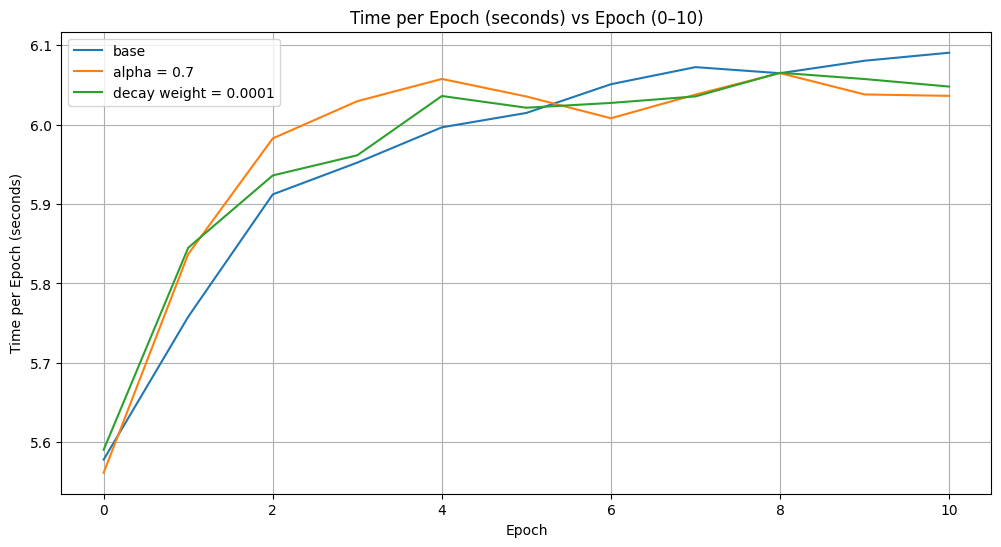

In [ ]:
import os
import json
import matplotlib.pyplot as plt

# Set your absolute base directory
base_dir = '/media/ntu/volume1/home/s124md302_08/models/DRew/lrgb/results'

# Configs and their display labels
configs = {
    "pept-func_drew-frond_bs=0128_d=016_L=02_base": "base",
    "pept-func_drew-frond_bs=0128_d=016_L=02_Alpha=0.7": "alpha = 0.7",
    "pept-func_drew-frond_bs=0128_d=016_L=02_DW=0.0001": "decay weight = 0.0001",
    # You can uncomment these later if needed
    # "pept-func_drew-frond_bs=0128_d=016_L=02_Hiddendim=512": "hidden dim = 512",
    # "pept-func_drew-frond_bs=0128_d=016_L=02_lr=0.003": "lr = 0.003",
    # "pept-func_drew-frond_bs=0128_d=016_L=02_lr=0.0003": "lr = 0.0003",
    # "pept-func_drew-frond_bs=0128_d=016_L=02_Hiddendim=128": "hidden dim = 128"
}

all_data = {}

# Load data
for config, label in configs.items():
    stats_path = os.path.join(base_dir, config, 'agg', 'val', 'stats.json')
    
    if not os.path.isfile(stats_path):
        print(f"Skipping {label} – stats.json not found at {stats_path}")
        continue

    with open(stats_path, 'r') as f:
        stats = [json.loads(line) for line in f if line.strip()]  # line-by-line JSON

    # Restrict to epoch 0–10
    epochs = [entry['epoch'] for entry in stats if entry['epoch'] <= 10]
    aucs   = [entry['auc'] for entry in stats if entry['epoch'] <= 10]
    aps    = [entry['ap'] for entry in stats if entry['epoch'] <= 10]
    losses = [entry['loss'] for entry in stats if entry['epoch'] <= 10]
    times  = [entry['time_epoch'] for entry in stats if entry['epoch'] <= 10]

    all_data[label] = {
        'epoch': epochs,
        'auc': aucs,
        'ap': aps,
        'loss': losses,
        'time': times
    }

# Plot function
def plot_metric(metric, ylabel):
    plt.figure(figsize=(12, 6))
    for label, data in all_data.items():
        plt.plot(data['epoch'], data[metric], label=label)
    plt.xlabel('Epoch')
    plt.ylabel(ylabel)
    plt.title(f'{ylabel} vs Epoch (0–10)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot each metric
plot_metric('auc', 'AUC')
plot_metric('ap', 'Average Precision (AP)')
plot_metric('loss', 'Loss')
plot_metric('time', 'Time per Epoch (seconds)')


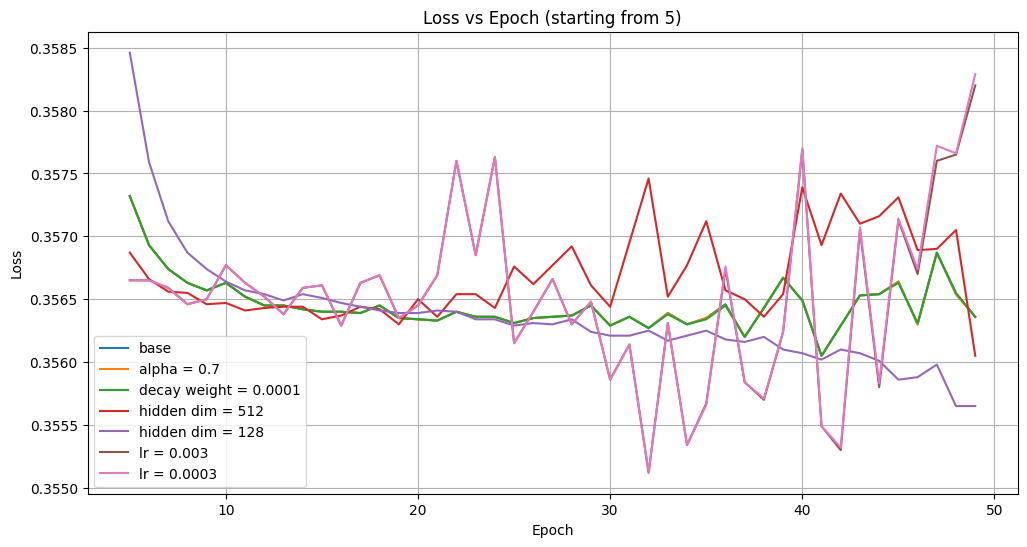

In [31]:
import os
import json
import matplotlib.pyplot as plt

# Set your absolute base directory
base_dir = '/media/ntu/volume1/home/s124md302_08/models/DRew/lrgb/results'

# Configs and their display labels (with 2 new entries!)
configs = {
    "pept-func_drew-frond_bs=0128_d=016_L=02_base": "base",
    "pept-func_drew-frond_bs=0128_d=016_L=02_Alpha=0.7": "alpha = 0.7",
    "pept-func_drew-frond_bs=0128_d=016_L=02_DW=0.0001": "decay weight = 0.0001",
    "pept-func_drew-frond_bs=0128_d=016_L=02_Hiddendim=512": "hidden dim = 512",
    "pept-func_drew-frond_bs=0128_d=016_L=02_Hiddendim=128": "hidden dim = 128",
    "pept-func_drew-frond_bs=0128_d=016_L=02_lr=0.003": "lr = 0.003",
    "pept-func_drew-frond_bs=0128_d=016_L=02_lr=0.0003": "lr = 0.0003"
}

# Dictionary to store all metric data
all_data = {}

# Load data from stats.json per config
for config, label in configs.items():
    stats_path = os.path.join(base_dir, config, 'agg', 'val', 'stats.json')
    
    if not os.path.isfile(stats_path):
        print(f"Skipping {label} – stats.json not found at {stats_path}")
        continue

    with open(stats_path, 'r') as f:
        stats = [json.loads(line) for line in f if line.strip()]

    # Filter to epoch <= 49
    filtered_stats = [entry for entry in stats if entry['epoch'] <= 49]

    all_data[label] = {
        'epoch': [entry['epoch'] for entry in filtered_stats],
        'auc':   [entry['auc'] for entry in filtered_stats],
        'ap':    [entry['ap'] for entry in filtered_stats],
        'loss':  [entry['loss'] for entry in filtered_stats],
        'time':  [entry['time_epoch'] for entry in filtered_stats]
    }

# Plotting function with epoch filter
def plot_metric(metric, ylabel, min_epoch=0):
    plt.figure(figsize=(12, 6))
    for label, data in all_data.items():
        # Only plot epochs >= min_epoch
        filtered = [(e, v) for e, v in zip(data['epoch'], data[metric]) if e >= min_epoch]
        if not filtered:
            continue
        epochs, values = zip(*filtered)
        plt.plot(epochs, values, label=label)
    plt.xlabel('Epoch')
    plt.ylabel(ylabel)
    plt.title(f'{ylabel} vs Epoch (starting from {min_epoch})')
    plt.legend()
    plt.grid(True)
    plt.show()

# 🔽 Plots
# plot_metric('auc', 'AUC', min_epoch=0)
# plot_metric('ap', 'Average Precision (AP)', min_epoch=0)
plot_metric('loss', 'Loss', min_epoch=5)
# plot_metric('time', 'Time per Epoch (seconds)', min_epoch=5)


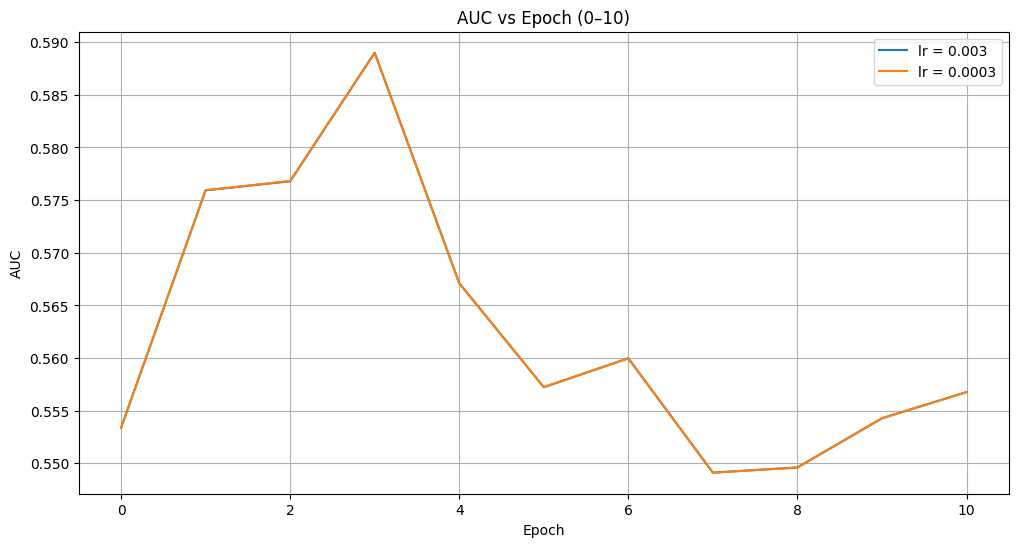

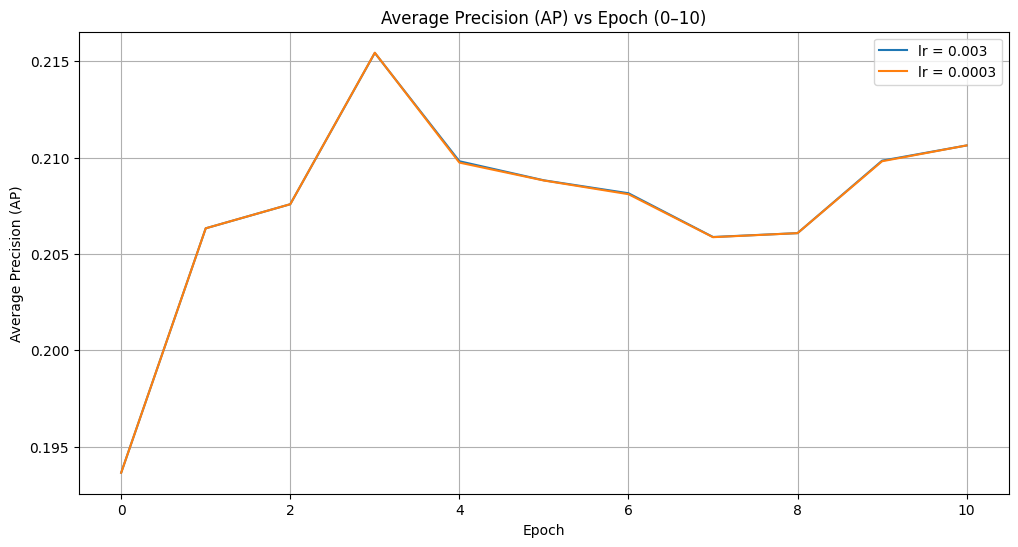

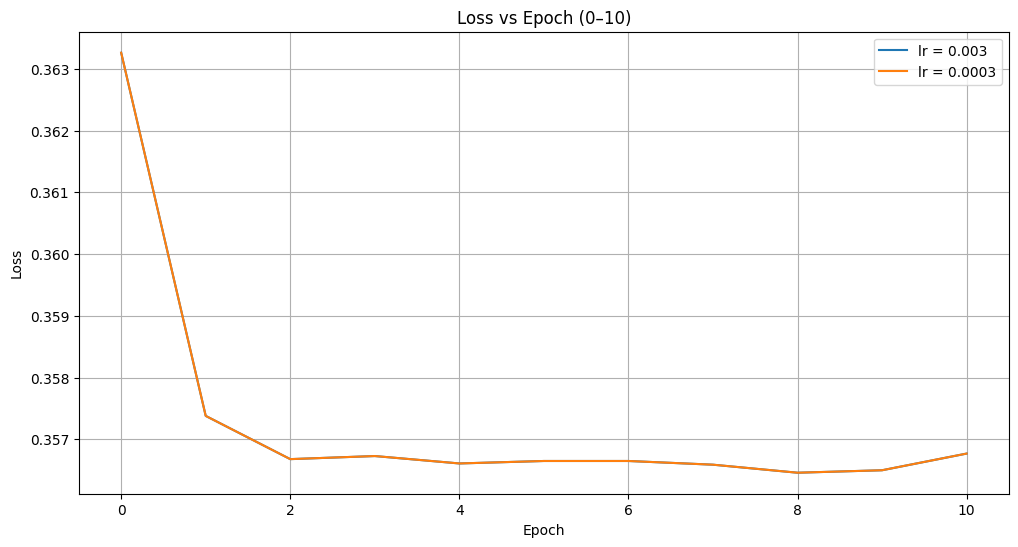

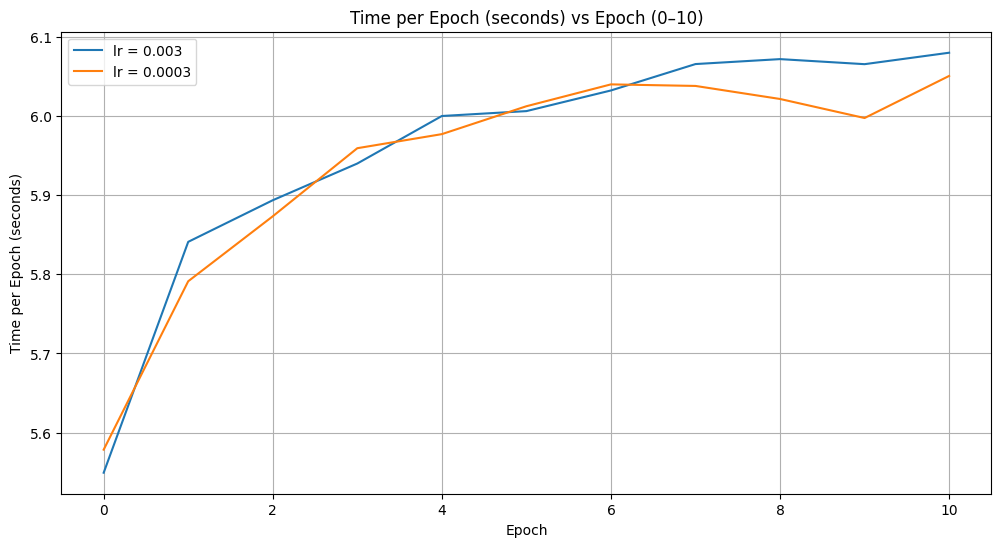

In [23]:
import os
import json
import matplotlib.pyplot as plt

# Set your absolute base directory
base_dir = '/media/ntu/volume1/home/s124md302_08/models/DRew/lrgb/results'

# Configs and their display labels
configs = {
    # "pept-func_drew-frond_bs=0128_d=016_L=02_base": "base",
    # "pept-func_drew-frond_bs=0128_d=016_L=02_Alpha=0.7": "alpha = 0.7",
    # "pept-func_drew-frond_bs=0128_d=016_L=02_DW=0.0001": "decay weight = 0.0001",
    # You can uncomment these later if needed
    # "pept-func_drew-frond_bs=0128_d=016_L=02_Hiddendim=512": "hidden dim = 512",
    "pept-func_drew-frond_bs=0128_d=016_L=02_lr=0.003": "lr = 0.003",
    "pept-func_drew-frond_bs=0128_d=016_L=02_lr=0.0003": "lr = 0.0003",
    # "pept-func_drew-frond_bs=0128_d=016_L=02_Hiddendim=128": "hidden dim = 128"
}

all_data = {}

# Load data
for config, label in configs.items():
    stats_path = os.path.join(base_dir, config, 'agg', 'val', 'stats.json')
    
    if not os.path.isfile(stats_path):
        print(f"Skipping {label} – stats.json not found at {stats_path}")
        continue

    with open(stats_path, 'r') as f:
        stats = [json.loads(line) for line in f if line.strip()]  # line-by-line JSON

    # Restrict to epoch 0–10
    epochs = [entry['epoch'] for entry in stats if entry['epoch'] <= 10]
    aucs   = [entry['auc'] for entry in stats if entry['epoch'] <= 10]
    aps    = [entry['ap'] for entry in stats if entry['epoch'] <= 10]
    losses = [entry['loss'] for entry in stats if entry['epoch'] <= 10]
    times  = [entry['time_epoch'] for entry in stats if entry['epoch'] <= 10]

    all_data[label] = {
        'epoch': epochs,
        'auc': aucs,
        'ap': aps,
        'loss': losses,
        'time': times
    }

# Plot function
def plot_metric(metric, ylabel):
    plt.figure(figsize=(12, 6))
    for label, data in all_data.items():
        plt.plot(data['epoch'], data[metric], label=label)
    plt.xlabel('Epoch')
    plt.ylabel(ylabel)
    plt.title(f'{ylabel} vs Epoch (0–10)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot each metric
plot_metric('auc', 'AUC')
plot_metric('ap', 'Average Precision (AP)')
plot_metric('loss', 'Loss')
plot_metric('time', 'Time per Epoch (seconds)')


## 

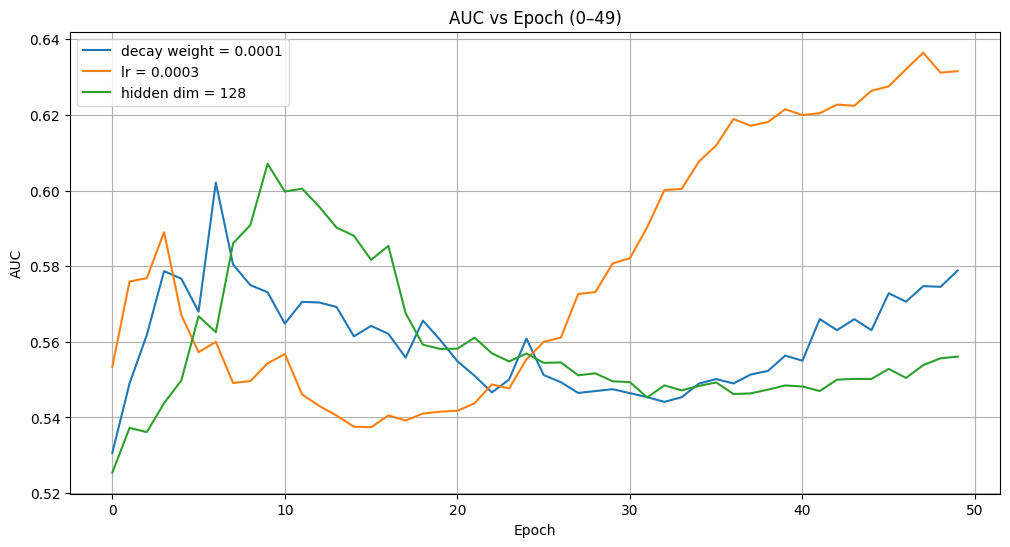

In [ ]:
import os
import json
import matplotlib.pyplot as plt

# Set your absolute base directory
base_dir = '/media/ntu/volume1/home/s124md302_08/models/DRew/lrgb/results'

# Configs and their display labels
configs = {
    # "pept-func_drew-frond_bs=0128_d=016_L=02_base": "base",
    # "pept-func_drew-frond_bs=0128_d=016_L=02_Alpha=0.7": "alpha = 0.7",
    "pept-func_drew-frond_bs=0128_d=016_L=02_DW=0.0001": "decay weight = 0.0001",
    # "pept-func_drew-frond_bs=0128_d=016_L=02_Hiddendim=512": "hidden dim = 512",
    # "pept-func_drew-frond_bs=0128_d=016_L=02_lr=0.003": "lr = 0.003",
    # "pept-func_drew-frond_bs=0128_d=016_L=02_lr=0.0003": "lr = 0.0003",
    "pept-func_drew-frond_bs=0128_d=016_L=02_Hiddendim=128": "hidden dim = 128"
}

all_data = {}

# Load data
for config, label in configs.items():
    stats_path = os.path.join(base_dir, config, 'agg', 'val', 'stats.json')
    
    if not os.path.isfile(stats_path):
        print(f"Skipping {label} – stats.json not found at {stats_path}")
        continue

    with open(stats_path, 'r') as f:
        stats = [json.loads(line) for line in f if line.strip()]  # Support for line-by-line JSON

    # Restrict to epoch 0–49
    epochs = [entry['epoch'] for entry in stats if entry['epoch'] <= 49]
    aucs   = [entry['auc'] for entry in stats if entry['epoch'] <= 49]
    aps    = [entry['ap'] for entry in stats if entry['epoch'] <= 49]
    losses = [entry['loss'] for entry in stats if entry['epoch'] <= 49]

    all_data[label] = {
        'epoch': epochs,
        'auc': aucs,
        'ap': aps,
        'loss': losses
    }

# Plot function
def plot_metric(metric, ylabel):
    plt.figure(figsize=(12, 6))
    for label, data in all_data.items():
        plt.plot(data['epoch'], data[metric], label=label)
    plt.xlabel('Epoch')
    plt.ylabel(ylabel)
    plt.title(f'{ylabel} vs Epoch (0–49)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot each metric
plot_metric('auc', 'AUC')
# plot_metric('ap', 'Average Precision (AP)')
# plot_metric('loss', 'Loss')


## Testing layers

In [16]:
load_and_print(['results-peptides-func-layers.json'], '.', 'test', 'ap')

pept-func_drew-frond_bs=0128_d=016_L=02_base	18432801.0	0.21269	0.0
pept-func_drew-frond_bs=0128_d=016_L=02_layers=10	3836180.0	0.19922	0.0
pept-func_drew-frond_bs=0128_d=042_L=02_layers=1	269579.0	0.20208	0.0


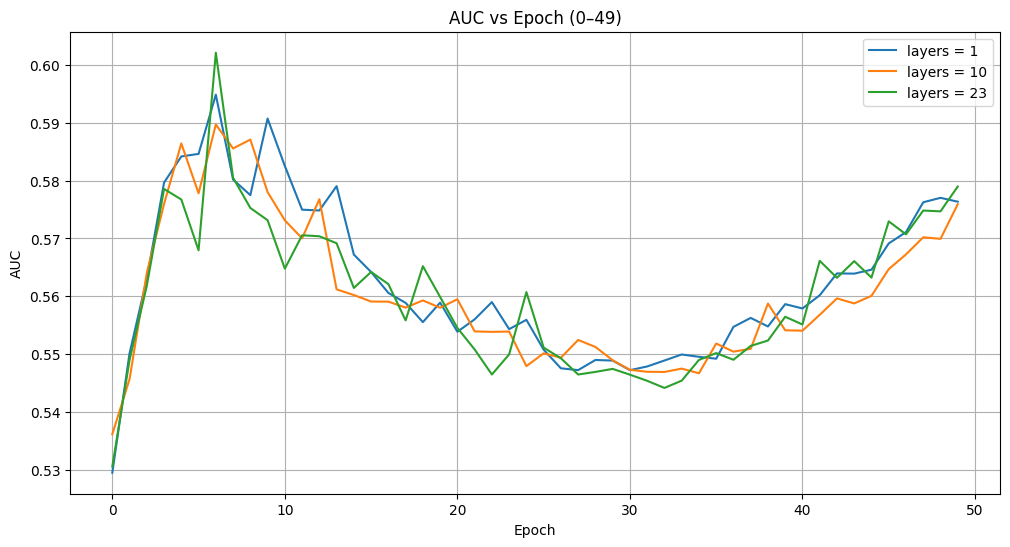

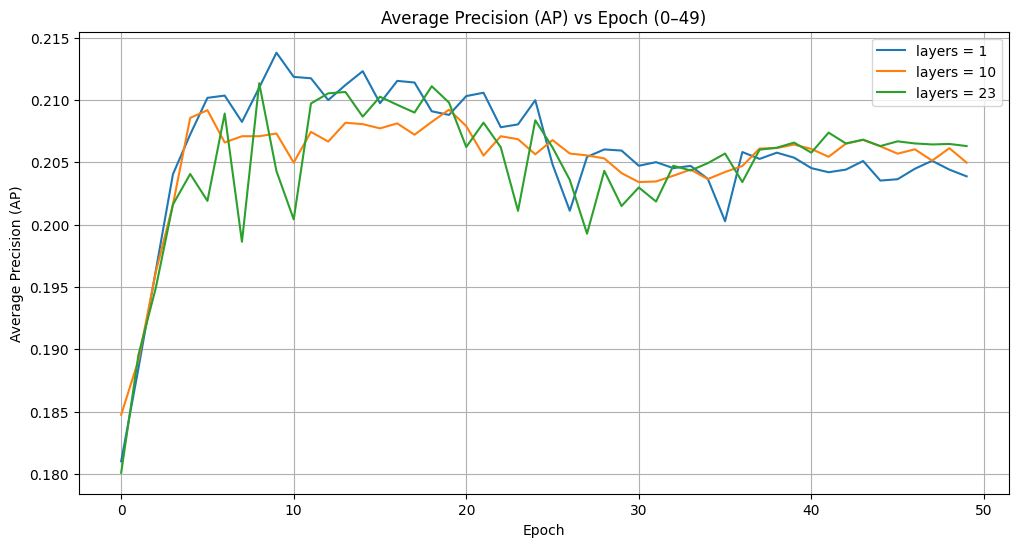

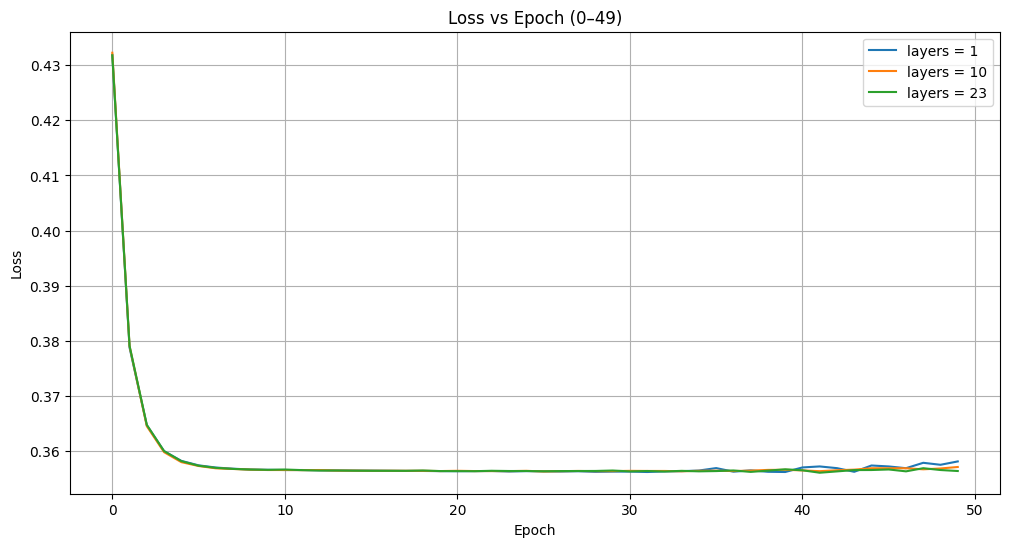

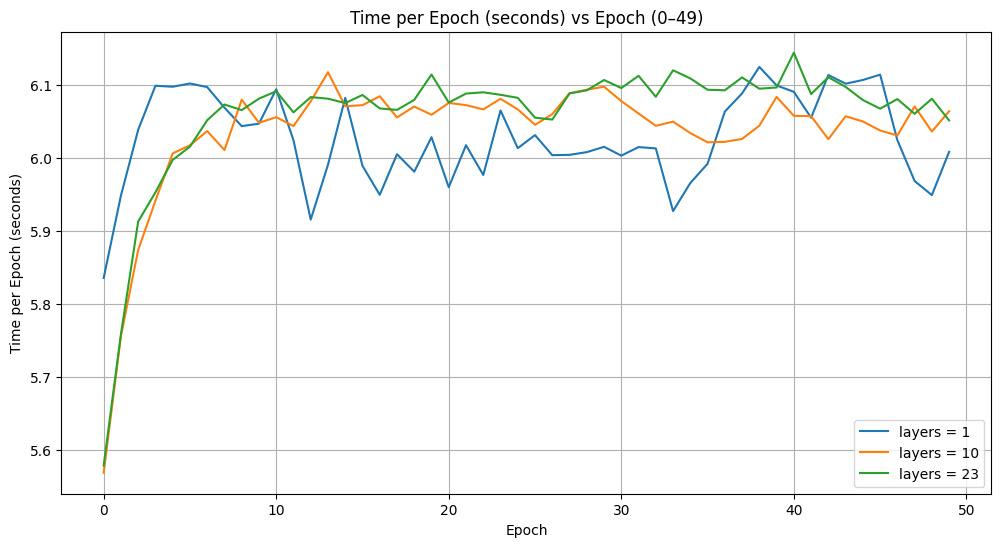

In [ ]:
import os
import json
import matplotlib.pyplot as plt

# Set your absolute base directory
base_dir = '/media/ntu/volume1/home/s124md302_08/models/DRew/lrgb/results'

# Configs and their display labels
configs = {
    "pept-func_drew-frond_bs=0128_d=042_L=02_layers=1": "layers = 1",
    "pept-func_drew-frond_bs=0128_d=016_L=02_layers=10": "layers = 10",
    "pept-func_drew-frond_bs=0128_d=016_L=02_base": "layers = 23"
}

all_data = {}

# Load data
for config, label in configs.items():
    stats_path = os.path.join(base_dir, config, 'agg', 'val', 'stats.json')
    
    if not os.path.isfile(stats_path):
        print(f"Skipping {label} – stats.json not found at {stats_path}")
        continue

    with open(stats_path, 'r') as f:
        stats = [json.loads(line) for line in f if line.strip()]  # line-by-line JSON

    # Restrict to epoch 0–49
    epochs = [entry['epoch'] for entry in stats if entry['epoch'] <= 49]
    aucs   = [entry['auc'] for entry in stats if entry['epoch'] <= 49]
    aps    = [entry['ap'] for entry in stats if entry['epoch'] <= 49]
    losses = [entry['loss'] for entry in stats if entry['epoch'] <= 49]
    times  = [entry['time_epoch'] for entry in stats if entry['epoch'] <= 49]

    all_data[label] = {
        'epoch': epochs,
        'auc': aucs,
        'ap': aps,
        'loss': losses,
        'time': times
    }

# Plot function
def plot_metric(metric, ylabel):
    plt.figure(figsize=(12, 6))
    for label, data in all_data.items():
        plt.plot(data['epoch'], data[metric], label=label)
    plt.xlabel('Epoch')
    plt.ylabel(ylabel)
    plt.title(f'{ylabel} vs Epoch (0–49)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot each metric
plot_metric('auc', 'AUC')
plot_metric('ap', 'Average Precision (AP)')
# plot_metric('loss', 'Loss')
plot_metric('time', 'Time per Epoch (seconds)')


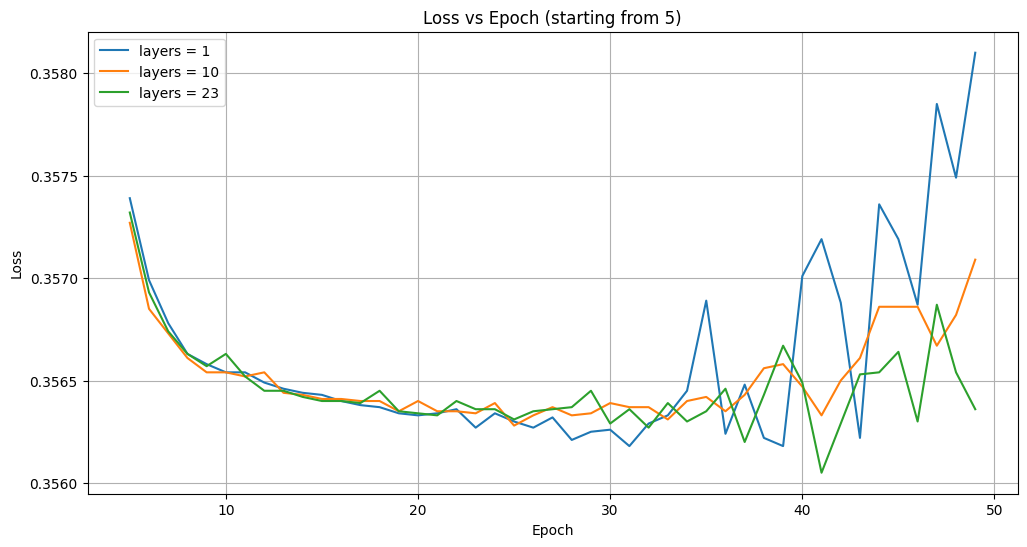

In [30]:
import os
import json
import matplotlib.pyplot as plt

# Set your absolute base directory
base_dir = '/media/ntu/volume1/home/s124md302_08/models/DRew/lrgb/results'

# Configs and their display labels (with 2 new entries!)
configs = {
    "pept-func_drew-frond_bs=0128_d=042_L=02_layers=1": "layers = 1",
    "pept-func_drew-frond_bs=0128_d=016_L=02_layers=10": "layers = 10",
    "pept-func_drew-frond_bs=0128_d=016_L=02_base": "layers = 23"
}

# Dictionary to store all metric data
all_data = {}

# Load data from stats.json per config
for config, label in configs.items():
    stats_path = os.path.join(base_dir, config, 'agg', 'val', 'stats.json')
    
    if not os.path.isfile(stats_path):
        print(f"⚠️ Skipping {label} – stats.json not found at {stats_path}")
        continue

    with open(stats_path, 'r') as f:
        stats = [json.loads(line) for line in f if line.strip()]

    # Filter to epoch <= 49
    filtered_stats = [entry for entry in stats if entry['epoch'] <= 49]

    all_data[label] = {
        'epoch': [entry['epoch'] for entry in filtered_stats],
        'auc':   [entry['auc'] for entry in filtered_stats],
        'ap':    [entry['ap'] for entry in filtered_stats],
        'loss':  [entry['loss'] for entry in filtered_stats],
        'time':  [entry['time_epoch'] for entry in filtered_stats]
    }

# Plotting function with epoch filter
def plot_metric(metric, ylabel, min_epoch=0):
    plt.figure(figsize=(12, 6))
    for label, data in all_data.items():
        # Only plot epochs >= min_epoch
        filtered = [(e, v) for e, v in zip(data['epoch'], data[metric]) if e >= min_epoch]
        if not filtered:
            continue
        epochs, values = zip(*filtered)
        plt.plot(epochs, values, label=label)
    plt.xlabel('Epoch')
    plt.ylabel(ylabel)
    plt.title(f'{ylabel} vs Epoch (starting from {min_epoch})')
    plt.legend()
    plt.grid(True)
    plt.show()

# 🔽 Plots
# plot_metric('auc', 'AUC', min_epoch=0)
# plot_metric('ap', 'Average Precision (AP)', min_epoch=0)
plot_metric('loss', 'Loss', min_epoch=5)
# plot_metric('time', 'Time per Epoch (seconds)', min_epoch=0)


## Discrete layers comparison

In [9]:
load_and_print(['results-peptides-func-discreteTime.json'], '.', 'test', 'ap')

pept-func_drew-frond_bs=0128_d=016_L=02_T=10	18432801.0	0.22364	0.0
pept-func_drew-frond_bs=0128_d=016_L=02_T=20	18432801.0	0.19993	0.0
pept-func_drew-frond_bs=0128_d=016_L=02_T=30	18432801.0	0.20205	0.0
pept-func_drew-frond_bs=0128_d=016_L=02_base	18432801.0	0.21269	0.0


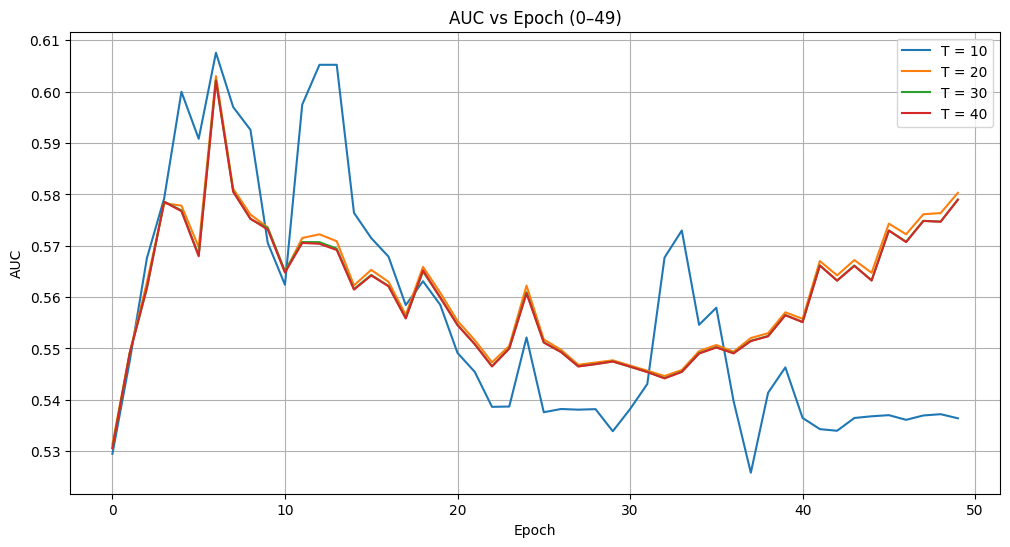

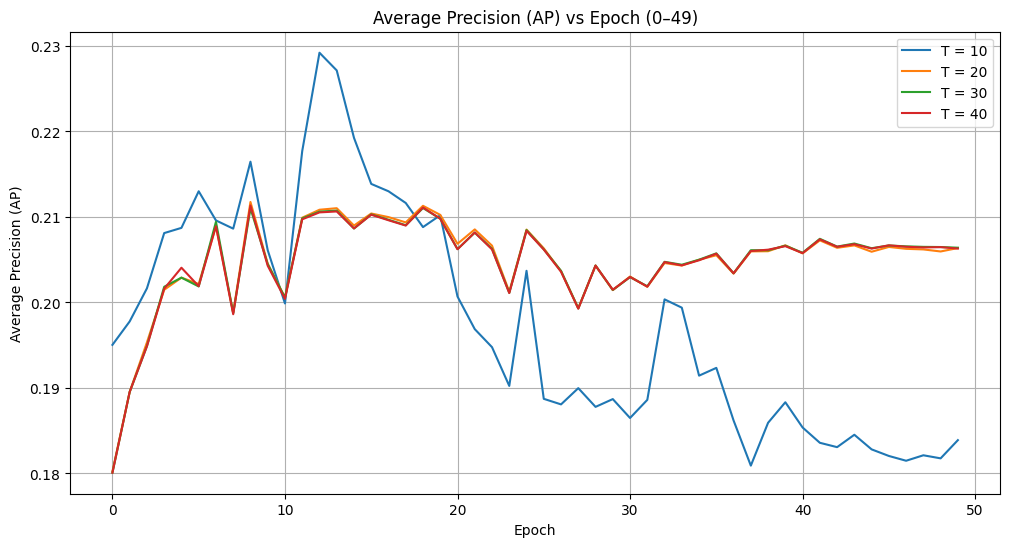

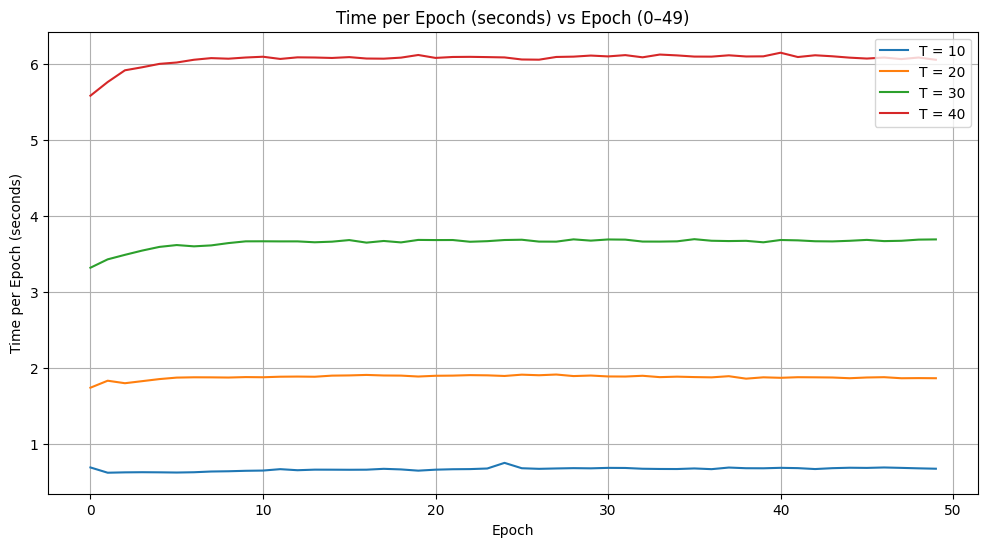

In [11]:
import os
import json
import matplotlib.pyplot as plt

# Set your absolute base directory
base_dir = '/media/ntu/volume1/home/s124md302_08/models/DRew/lrgb/results'

# Configs and their display labels
configs = {
    "pept-func_drew-frond_bs=0128_d=016_L=02_T=10": "T = 10",
    "pept-func_drew-frond_bs=0128_d=016_L=02_T=20": "T = 20",
    "pept-func_drew-frond_bs=0128_d=016_L=02_T=30": "T = 30",
    "pept-func_drew-frond_bs=0128_d=016_L=02_base": "T = 40"
}

all_data = {}

# Load data
for config, label in configs.items():
    stats_path = os.path.join(base_dir, config, 'agg', 'val', 'stats.json')
    
    if not os.path.isfile(stats_path):
        print(f"Skipping {label} – stats.json not found at {stats_path}")
        continue

    with open(stats_path, 'r') as f:
        stats = [json.loads(line) for line in f if line.strip()]  # line-by-line JSON

    # Restrict to epoch 0–49
    epochs = [entry['epoch'] for entry in stats if entry['epoch'] <= 49]
    aucs   = [entry['auc'] for entry in stats if entry['epoch'] <= 49]
    aps    = [entry['ap'] for entry in stats if entry['epoch'] <= 49]
    losses = [entry['loss'] for entry in stats if entry['epoch'] <= 49]
    times  = [entry['time_epoch'] for entry in stats if entry['epoch'] <= 49]

    all_data[label] = {
        'epoch': epochs,
        'auc': aucs,
        'ap': aps,
        'loss': losses,
        'time': times
    }

# Plot function
def plot_metric(metric, ylabel):
    plt.figure(figsize=(12, 6))
    for label, data in all_data.items():
        plt.plot(data['epoch'], data[metric], label=label)
    plt.xlabel('Epoch')
    plt.ylabel(ylabel)
    plt.title(f'{ylabel} vs Epoch (0–49)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot each metric
plot_metric('auc', 'AUC')
plot_metric('ap', 'Average Precision (AP)')
# plot_metric('loss', 'Loss')
plot_metric('time', 'Time per Epoch (seconds)')


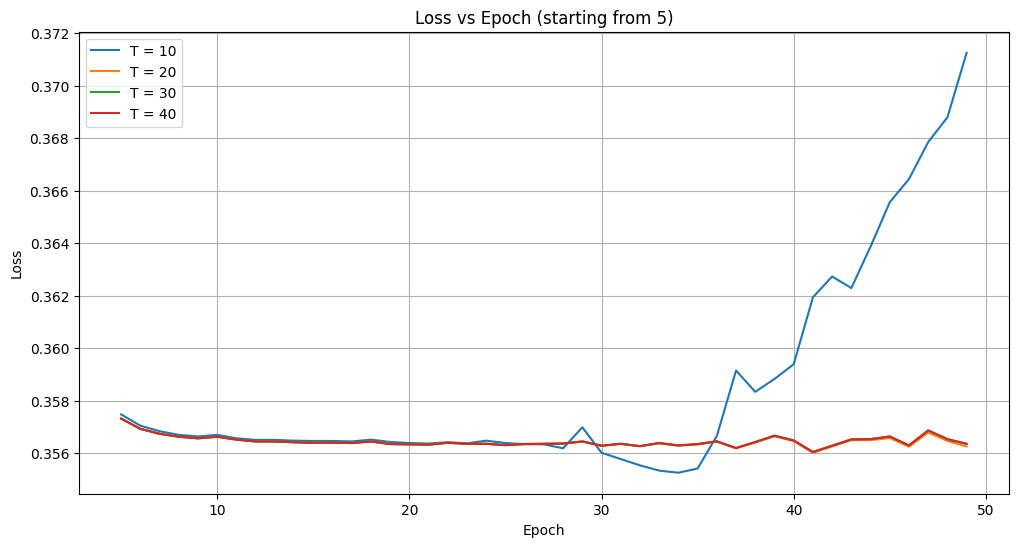

In [12]:
import os
import json
import matplotlib.pyplot as plt

# Set your absolute base directory
base_dir = '/media/ntu/volume1/home/s124md302_08/models/DRew/lrgb/results'

# Configs and their display labels (with 2 new entries!)
configs = {
    "pept-func_drew-frond_bs=0128_d=016_L=02_T=10": "T = 10",
    "pept-func_drew-frond_bs=0128_d=016_L=02_T=20": "T = 20",
    "pept-func_drew-frond_bs=0128_d=016_L=02_T=30": "T = 30",
    "pept-func_drew-frond_bs=0128_d=016_L=02_base": "T = 40"
}

# Dictionary to store all metric data
all_data = {}

# Load data from stats.json per config
for config, label in configs.items():
    stats_path = os.path.join(base_dir, config, 'agg', 'val', 'stats.json')
    
    if not os.path.isfile(stats_path):
        print(f"⚠️ Skipping {label} – stats.json not found at {stats_path}")
        continue

    with open(stats_path, 'r') as f:
        stats = [json.loads(line) for line in f if line.strip()]

    # Filter to epoch <= 49
    filtered_stats = [entry for entry in stats if entry['epoch'] <= 49]

    all_data[label] = {
        'epoch': [entry['epoch'] for entry in filtered_stats],
        'auc':   [entry['auc'] for entry in filtered_stats],
        'ap':    [entry['ap'] for entry in filtered_stats],
        'loss':  [entry['loss'] for entry in filtered_stats],
        'time':  [entry['time_epoch'] for entry in filtered_stats]
    }

# Plotting function with epoch filter
def plot_metric(metric, ylabel, min_epoch=0):
    plt.figure(figsize=(12, 6))
    for label, data in all_data.items():
        # Only plot epochs >= min_epoch
        filtered = [(e, v) for e, v in zip(data['epoch'], data[metric]) if e >= min_epoch]
        if not filtered:
            continue
        epochs, values = zip(*filtered)
        plt.plot(epochs, values, label=label)
    plt.xlabel('Epoch')
    plt.ylabel(ylabel)
    plt.title(f'{ylabel} vs Epoch (starting from {min_epoch})')
    plt.legend()
    plt.grid(True)
    plt.show()

# 🔽 Plots
# plot_metric('auc', 'AUC', min_epoch=0)
# plot_metric('ap', 'Average Precision (AP)', min_epoch=0)
plot_metric('loss', 'Loss', min_epoch=5)
# plot_metric('time', 'Time per Epoch (seconds)', min_epoch=0)


## Comparison of DRew-Frond optimised with Drew-Frond and Baseline GNN and comparative model

In [6]:
load_and_print(['results-peptides-func-comparison.json'], '.', 'test', 'ap')

pept-func_drew-frond_bs=0128_d=016_L=02_base	18432801.0	0.21269	0.0
pept-func_drew-frond_bs=0128_d=016_L=02_optim	73434657.0	0.21823	0.0
pept-func_gatedgcnconv_bs=0128_d=138_L=05	509506.0	0.57835	0.0
pept-func_gineconv_bs=0128_d=208_L=05	475706.0	0.55951	0.0
pept-func_stack_bs=0128_d=300_L=05	508210.0	0.3846	0.0


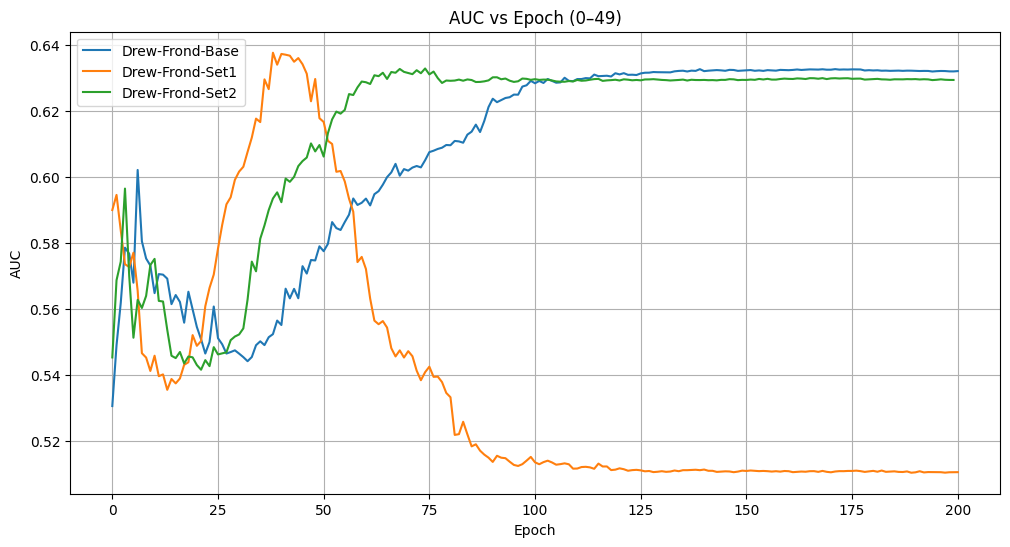

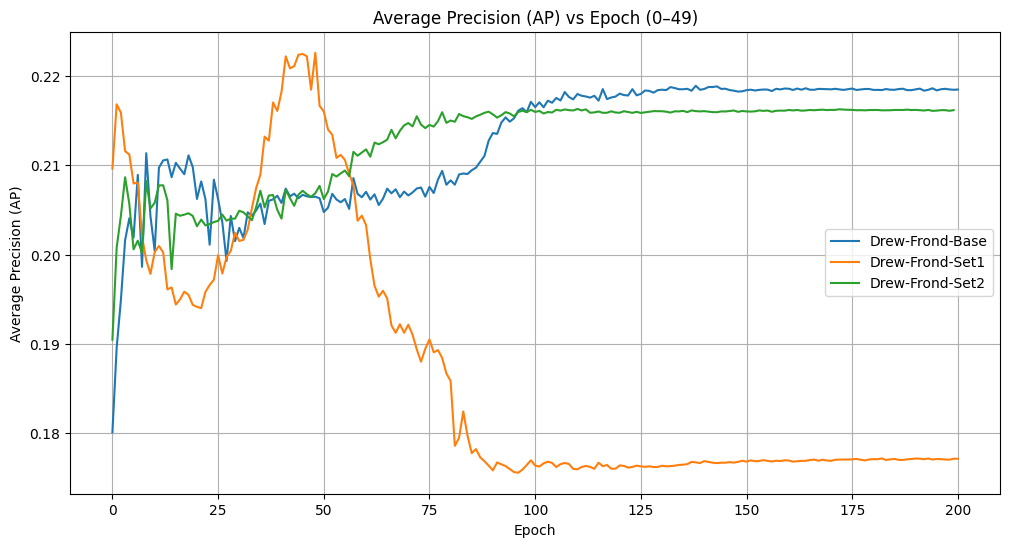

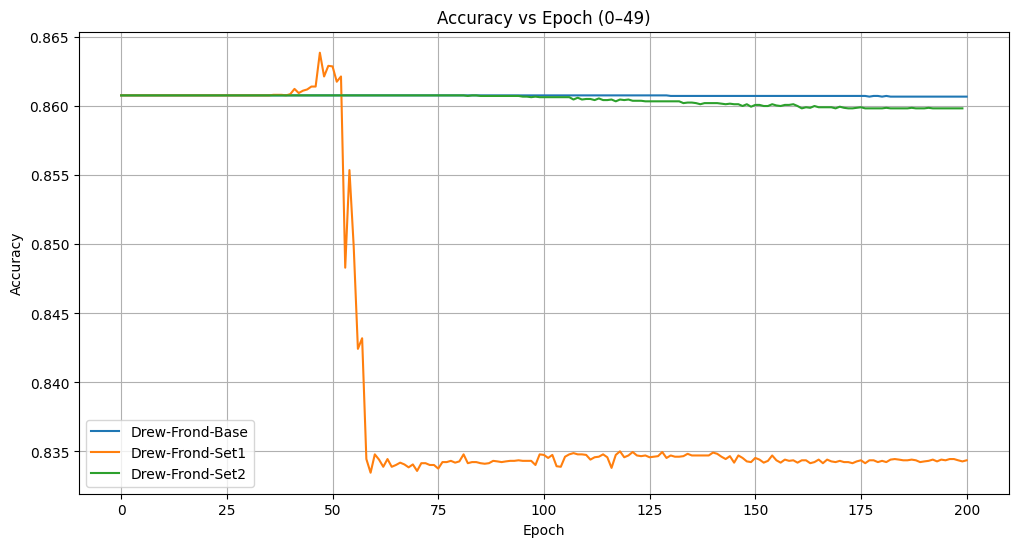

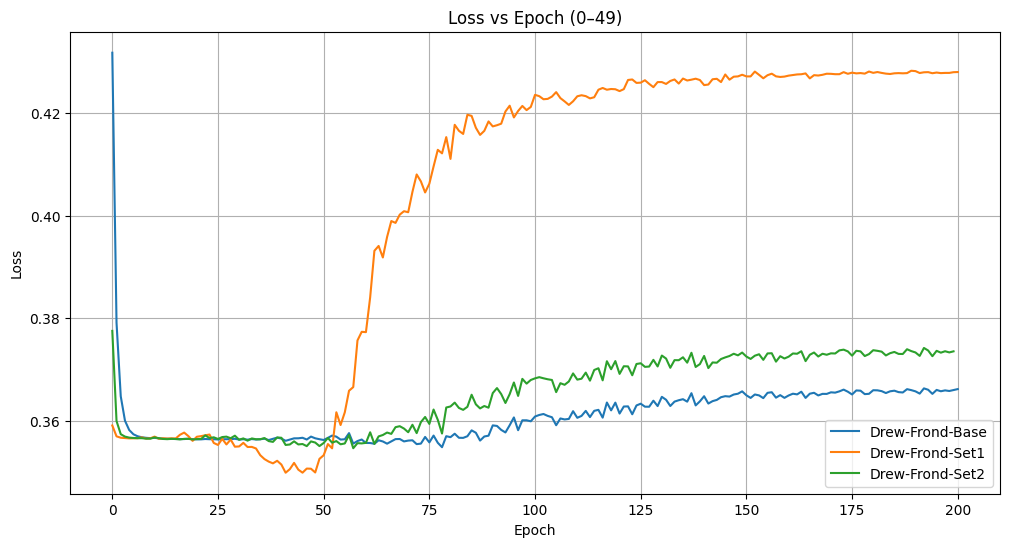

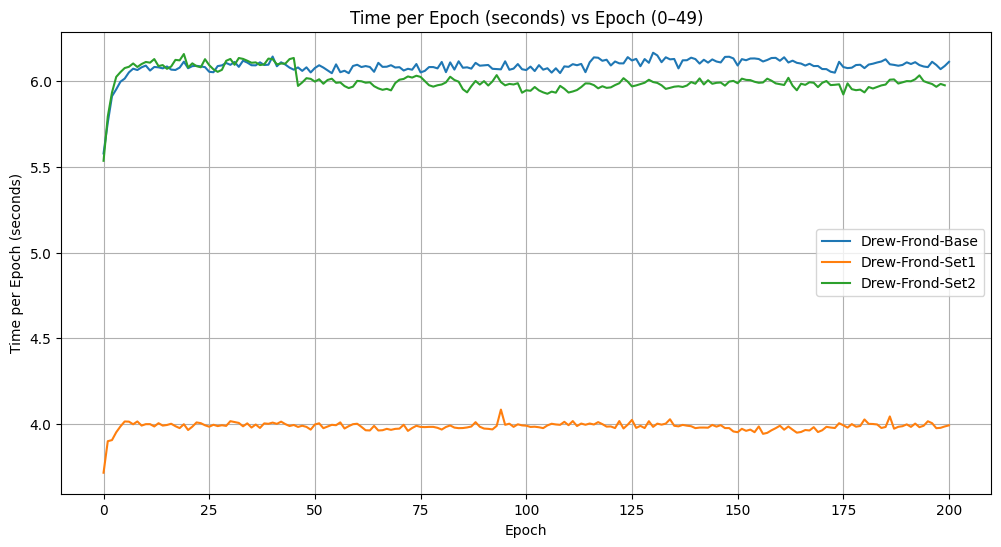

In [25]:
import os
import json
import matplotlib.pyplot as plt

# Set your absolute base directory
base_dir = '/media/ntu/volume1/home/s124md302_08/models/DRew/lrgb/results'

# Configs and their display labels
configs = {
    "pept-func_drew-frond_bs=0128_d=016_L=02_base": "Drew-Frond-Base",
    "pept-func_drew-frond_bs=0128_d=016_L=02_optim": "Drew-Frond-Set1",
    "pept-func_drew-frond_bs=0128_d=016_L=02_optim2": "Drew-Frond-Set2",
    # "pept-func_drew_gnn_bs=0128_d=016_L=02": "Drew"
}

all_data = {}

# Load data
for config, label in configs.items():
    stats_path = os.path.join(base_dir, config, 'agg', 'val', 'stats.json')
    
    if not os.path.isfile(stats_path):
        print(f"Skipping {label} – stats.json not found at {stats_path}")
        continue

    with open(stats_path, 'r') as f:
        stats = [json.loads(line) for line in f if line.strip()]  # line-by-line JSON

    # Restrict to epoch 0–49
    epochs     = [entry['epoch'] for entry in stats if entry['epoch'] <= 200]
    aucs       = [entry['auc'] for entry in stats if entry['epoch'] <= 200]
    aps        = [entry['ap'] for entry in stats if entry['epoch'] <= 200]
    losses     = [entry['loss'] for entry in stats if entry['epoch'] <= 200]
    times      = [entry['time_epoch'] for entry in stats if entry['epoch'] <= 200]
    accuracies = [entry['accuracy'] for entry in stats if entry['epoch'] <= 200]

    all_data[label] = {
        'epoch': epochs,
        'auc': aucs,
        'ap': aps,
        'loss': losses,
        'time': times,
        'accuracy': accuracies
    }

# Plot function
def plot_metric(metric, ylabel):
    plt.figure(figsize=(12, 6))
    for label, data in all_data.items():
        plt.plot(data['epoch'], data[metric], label=label)
    plt.xlabel('Epoch')
    plt.ylabel(ylabel)
    plt.title(f'{ylabel} vs Epoch (0–49)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot each metric
plot_metric('auc', 'AUC')
plot_metric('ap', 'Average Precision (AP)')
plot_metric('accuracy', 'Accuracy')
plot_metric('loss', 'Loss')
plot_metric('time', 'Time per Epoch (seconds)')


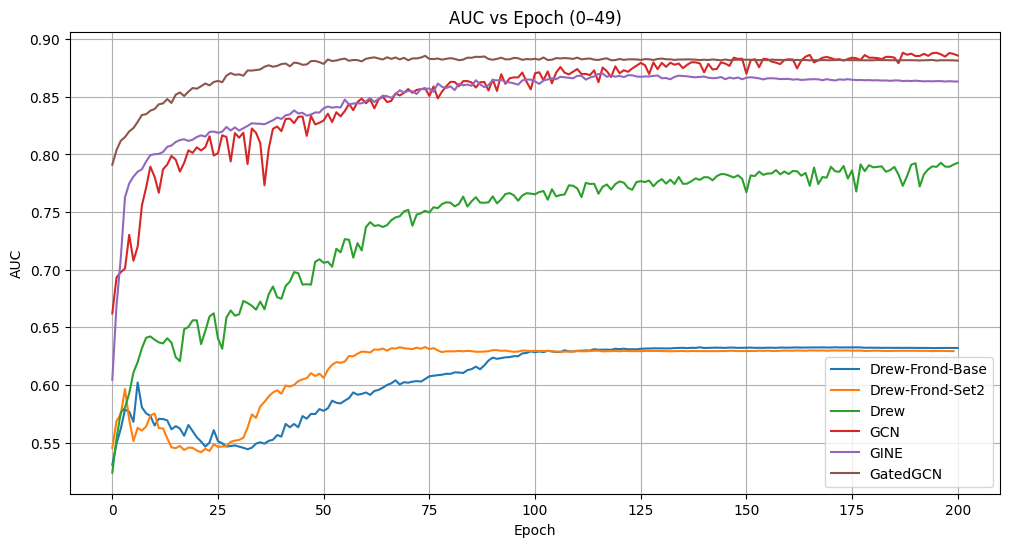

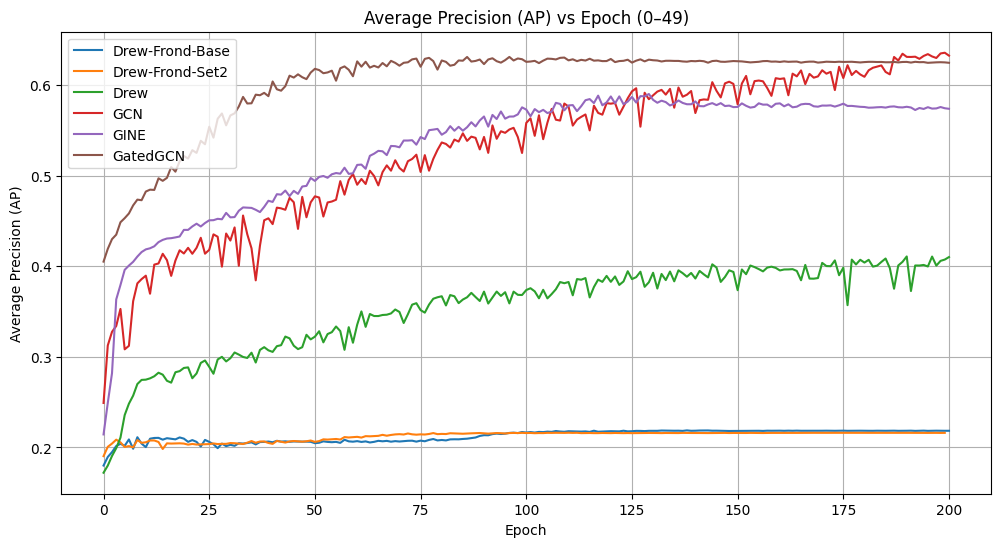

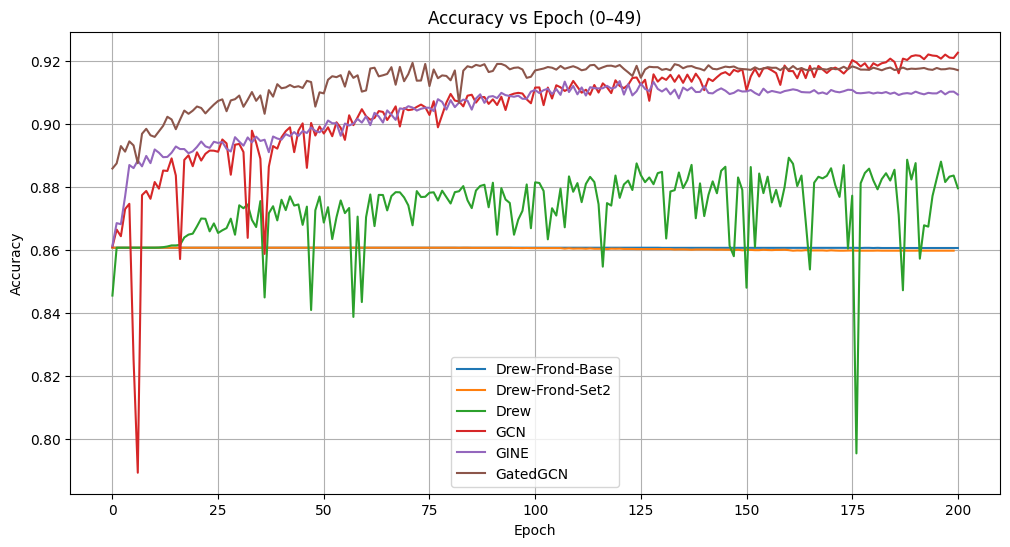

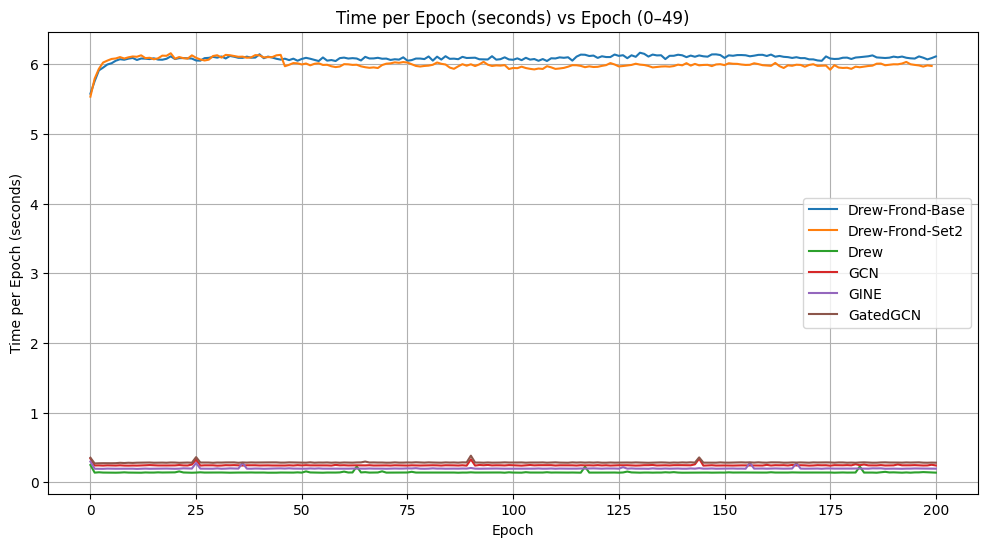

In [26]:
import os
import json
import matplotlib.pyplot as plt

# Set your absolute base directory
base_dir = '/media/ntu/volume1/home/s124md302_08/models/DRew/lrgb/results'

# Configs and their display labels
configs = {
    "pept-func_drew-frond_bs=0128_d=016_L=02_base": "Drew-Frond-Base",
    # "pept-func_drew-frond_bs=0128_d=016_L=02_optim": "Drew-Frond-Set1",
    "pept-func_drew-frond_bs=0128_d=016_L=02_optim2": "Drew-Frond-Set2",
    "pept-func_drew_gnn_bs=0128_d=016_L=02": "Drew",
    "pept-func_stack_bs=0128_d=300_L=05": "GCN",
    "pept-func_gineconv_bs=0128_d=208_L=05": "GINE",
    "pept-func_gatedgcnconv_bs=0128_d=138_L=05": "GatedGCN"
}

all_data = {}

# Load data
for config, label in configs.items():
    stats_path = os.path.join(base_dir, config, 'agg', 'val', 'stats.json')
    
    if not os.path.isfile(stats_path):
        print(f"Skipping {label} – stats.json not found at {stats_path}")
        continue

    with open(stats_path, 'r') as f:
        stats = [json.loads(line) for line in f if line.strip()]  # line-by-line JSON

    # Restrict to epoch 0–49
    epochs     = [entry['epoch'] for entry in stats if entry['epoch'] <= 200]
    aucs       = [entry['auc'] for entry in stats if entry['epoch'] <= 200]
    aps        = [entry['ap'] for entry in stats if entry['epoch'] <= 200]
    losses     = [entry['loss'] for entry in stats if entry['epoch'] <= 200]
    times      = [entry['time_epoch'] for entry in stats if entry['epoch'] <= 200]
    accuracies = [entry['accuracy'] for entry in stats if entry['epoch'] <= 200]

    all_data[label] = {
        'epoch': epochs,
        'auc': aucs,
        'ap': aps,
        'loss': losses,
        'time': times,
        'accuracy': accuracies
    }

# Plot function
def plot_metric(metric, ylabel):
    plt.figure(figsize=(12, 6))
    for label, data in all_data.items():
        plt.plot(data['epoch'], data[metric], label=label)
    plt.xlabel('Epoch')
    plt.ylabel(ylabel)
    plt.title(f'{ylabel} vs Epoch (0–49)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot each metric
plot_metric('auc', 'AUC')
plot_metric('ap', 'Average Precision (AP)')
plot_metric('accuracy', 'Accuracy')
# plot_metric('loss', 'Loss')
plot_metric('time', 'Time per Epoch (seconds)')
